# Field map viewer
Its impossible to view the field maps given from and too opal so here's a code to view them 


In [1]:
#
import os
import matplotlib.pyplot as plt 
import numpy as np 
import math

def Convert2Cart(r=[],theta=[]):
    x=np.zeros(len(r))
    y=np.zeros(len(r))
    for th, i in enumerate(theta):
        x[i] = r*numpy.cos(th)
        y[i] = r*numpy.sin(th)    
    return x, y

#Dir =  "/home/stu/OPALFruit/tunes/External_Input_Maps"
Dir = "/mnt/c/Users/stu_w/OneDrive/codes/Opal/External_Input_Maps/"

FileName ="tmx55b_bfld_V3.dat"
#FileName = "inj72_sector.opal"
#FileName = "ring590_bfld.dat"
#FileName = "ZYKL9Z.dat"

data_headder = np.genfromtxt(os.path.join(Dir, FileName), max_rows= 6 )
data = np.genfromtxt(os.path.join(Dir, FileName), skip_header= 6 )
#print(data_headder)
#print(data)
if(len(data)>0 and len(data_headder)>0):
    print("File Loaded")
    R0 = data_headder[0]
    dR = data_headder[1]
    Th0= data_headder[2]
    dTh= data_headder[3]
    arcLen = int(data_headder[4])
    n_arcs = int(data_headder[5])
    if(dTh<0):
        symmetry = np.abs(dTh)
        dTh=1/dTh
    print("R0: ", R0, " mm \ndR: ",dR, " mm\nTh0: ",Th0 ,  "deg \ndTh: ",dTh , "deg\narcLen: ",arcLen , "\nn_arcs: ", n_arcs)

    


File Leaded
R0:  450.0  mm 
dR:  10.0  mm
Th0:  0.0 deg 
dTh:  -0.125 deg
arcLen:  2880 
n_arcs:  299


In [2]:
#rotate field about central axis theta 
rot= -30 
#Apply rotational offset 
if(rot!=0):
    data = np.reshape(data,(1, -1))
    data = np.transpose(data)
    arcsteps = int(np.floor(rot/dTh))    
    newdata = np.roll(data,arcsteps)
    data= newdata    
    print("Rotated ",rot," deg or ", arcsteps," steps on arc")
    OutFileName = FileName.split('.')
    OFile = OutFileName[0]+"_"+str(rot)+'.'+OutFileName[1]
    
    with open(os.path.join(Dir, OFile), 'w') as f:
       
        f.write(str(data_headder[0])+"\n")
        f.write(str(data_headder[1])+"\n")
        f.write(str(data_headder[2])+"\n")
        f.write(str(data_headder[3])+"\n")
        f.write(str(int(data_headder[4]))+"\n")
        f.write(str(int(data_headder[5])))
        f.write("\n   ")
        for i, l in enumerate(data):
            #print(l)
            f.write(str('{0:.5f}'.format(l[0])))
            
            if(np.mod(i+1,10)==0):
                f.write("\n   ")
            else:
                f.write("    ")          
            
    print("completed and writtent to:\n", os.path.join(Dir, OFile))   

else:
    #reshape
    data = np.reshape(data,(1, -1))
    data = np.transpose(data)

                

Rotated  -30  deg or  240  steps on arc
completed and writtent to:
 /mnt/c/Users/stu_w/OneDrive/codes/Opal/External_Input_Maps/tmx55b_bfld_V3_-30.dat


# Reshape input data to make sense 
The data is stored in the form of arc across the bfield in an arb format, here it is flattened then turned into arcs 

In [3]:
Rnow = 0
Thnow = 0

calcArcs = int(np.floor(len(data)/arcLen))
if(arcLen!= n_arcs):
            print("n arcs calc != file values :",calcArcs, " != ", n_arcs )
            n_arcs = calcArcs

# define the boundries to which you wish to work too 
thetaBounds=[-360,360]    
Rbounds= [0,10000]

x = np.zeros((arcLen,calcArcs), dtype = np.float16)
y = np.zeros((arcLen,calcArcs), dtype = np.float16)
z = np.zeros((arcLen,calcArcs), dtype = np.float16)

for i, d in enumerate(data):
    r = Rnow*dR +R0
    t = Thnow*dTh+ Th0
    if(r>=Rbounds[0] and r<=Rbounds[1] and t>=thetaBounds[0] and t<=thetaBounds[1]):
        x[Thnow,Rnow] = r*np.cos(math.radians(t))
        y[Thnow,Rnow] = r*np.sin(math.radians(t))
        z[Thnow,Rnow] = d
    if(Rnow>=n_arcs):
        print("something went wrong!")
    if(Thnow>= arcLen -1):
        Thnow = 0
        Rnow+=1
        
    else:
        Thnow+=1
    
    


n arcs calc != file values : 299  !=  299


Text(0.5, 1.0, 'Field map of tmx55b_bfld_V3.dat')

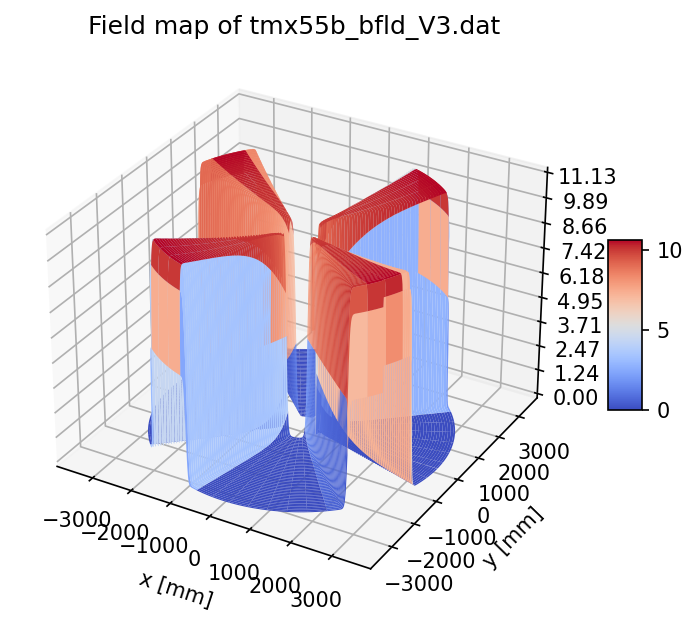

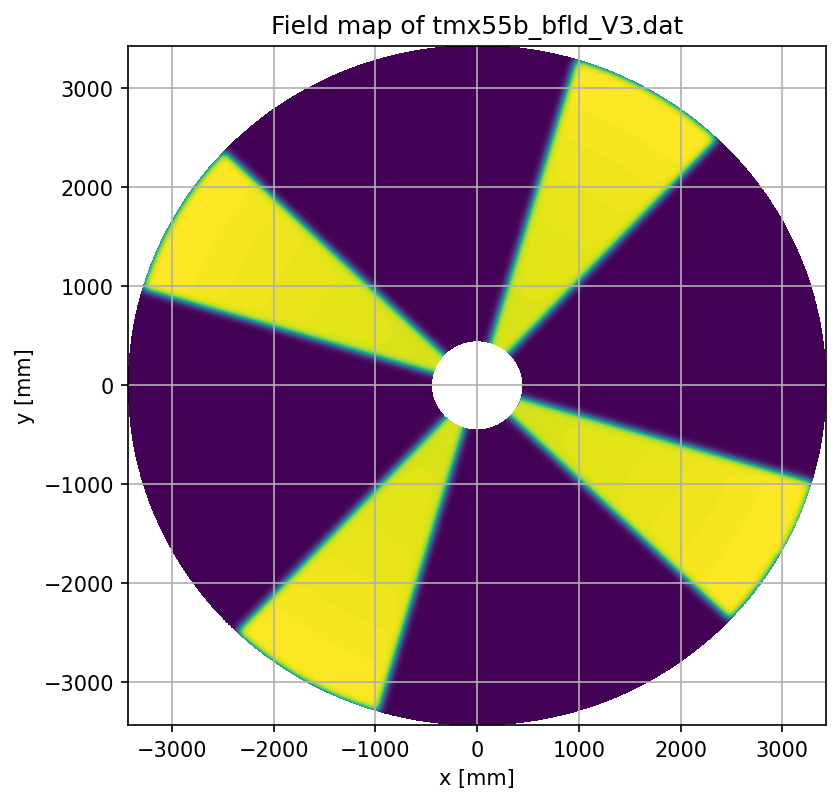

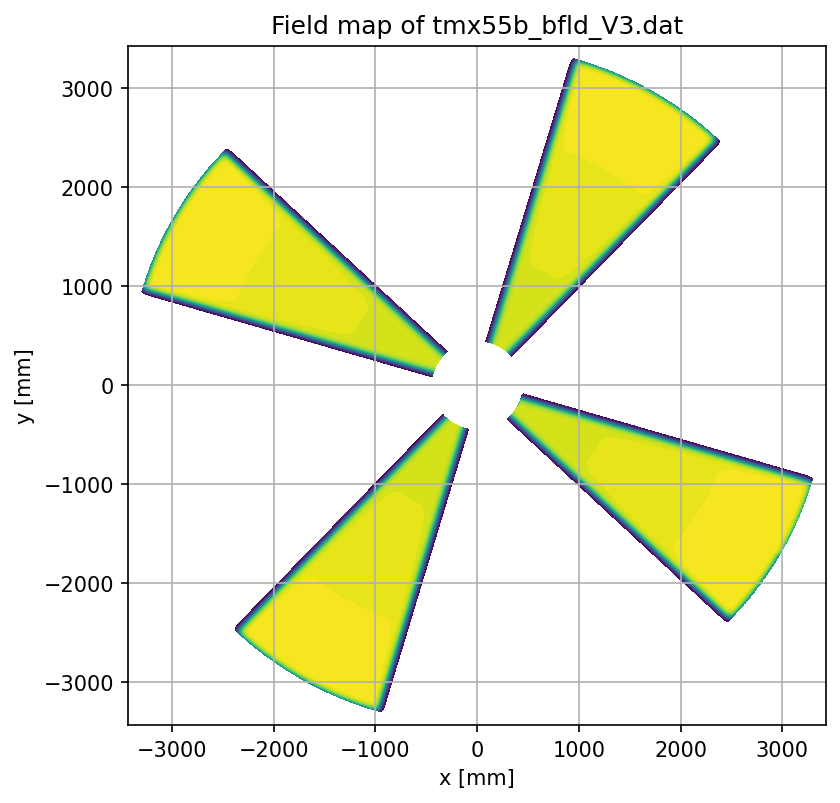

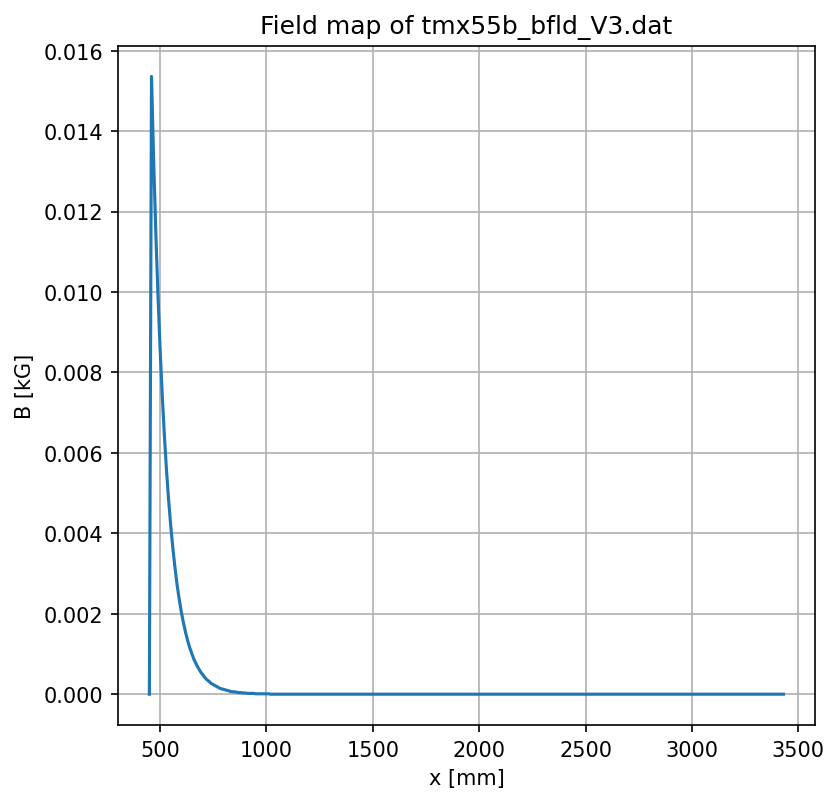

In [4]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

#plot the resulting map 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[6,6], dpi= 150, facecolor='w', edgecolor='k' )
levels = np.linspace(z.min(), z.max(), 20)

#X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=2, antialiased=True)
# Customize the z axis.
ax.set_zlim(0, z.max()*1.05)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.2f}')
ax.set_xlabel("x [mm]")
ax.set_ylabel("y [mm]")
ax.set_title("Field map of "+FileName)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.25, aspect=5)


fig, ax2 = plt.subplots(figsize=[6,6], dpi= 150, facecolor='w', edgecolor='k' )
levels = np.linspace(z.min(), z.max(), 100)
cont=ax2.contourf(x, y, z, levels=levels)
# Add a color bar which maps values to colors.
#fig.colorbar(cont, shrink=1, aspect=5)
ax2.grid()
ax2.set_xlabel("x [mm]")
ax2.set_ylabel("y [mm]")
ax2.set_title("Field map of "+FileName)

fig, ax3 = plt.subplots(figsize=[6,6], dpi= 150, facecolor='w', edgecolor='k' )
levelsl = np.logspace(0, np.log10(z.max()),num=100)
contl=ax3.contourf(x, y, z, levels=levelsl)
#fig.colorbar(contl, shrink=1, aspect=5)
ax3.grid()
ax3.set_xlabel("x [mm]")
ax3.set_ylabel("y [mm]")
ax3.set_title("Field map of "+FileName)


fig, ax4 = plt.subplots(figsize=[6,6], dpi= 150, facecolor='w', edgecolor='k' )

_x = np.zeros(len(x[0,:]))
_y = np.zeros(len(x[0,:]))
theta = 30
for i in range(len(x[0,:]):

               

ax4.plot(x[0,:],z[0,:] )
ax4.grid()
ax4.set_xlabel("x [mm]")
ax4.set_ylabel("B [kG]")
ax4.set_title("Field map of "+FileName)

# output the data in a better format 
Write the data to a file with simple output co-ordinates 



In [5]:
if(0):
    #file output will be in cartisian and polar 
    fout = FileName[0:FileName.find(".")] + "_converted.txt"
    with open(os.path.join(Dir,fout), 'w') as f:
        f.write("X[mm]\tY[mm]\tTheta[deg]\tR[mm]\tBz[kG]\n")
        Rnow = 0
        Thnow = 0
        #only write to file between these bounds
        #thetaBounds=[0,90]    
       # Rbounds= [0,10000]
        for i,d in enumerate(dt):
            r = Rnow*dR +R0
            t = Thnow*dTh+ Th0
            if(r>=Rbounds[0] and r<=Rbounds[1] and t>=thetaBounds[0] and t<=thetaBounds[1]):
                xv = r*np.cos(math.radians(t))
                yv = r*np.sin(math.radians(t))
                f.write(str(xv)+'\t'+str(yv)+'\t'+str(t)+'\t'+str(r)+'\t'+str(d[0])+'\n')

            if(Rnow>=n_arcs):
                print("something went wrong!")
            if(Thnow>= arcLen -1):
                Thnow = 0
                Rnow+=1

            else:
                Thnow+=1
        print("file write complete: ", fout)